In [11]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import itertools as it

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/data-Covid/Code'

In [12]:
from dicts_paths_v3 import *
from calc_functions_v3 import *
from graph_functions_v3 import *
from graph_functions2_v3 import *

Today is 12/04/2021. Retrieve data from how many days? 1
Ok, will retrieve data from 11/04/2021


In [13]:
fname = temp_path(date_choice, 'vacsi-a-dep', 'tot-3C')
dvac = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
fname = temp_path(date_choice, 'donnees-hospitalieres-classe-age-covid19', '3C-hebd')
dhos = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
fname = temp_path(date_choice, 'sp-pos-quot-dep', 'tot-3C-hebd')
dtes = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d = pd.merge(dtes, dhos, how = 'outer')
d = pd.merge(d, dvac, how = 'outer')
d = d.sort_values(['entity', 'three_class', 'jour'])

./Temp/5Lv3/vacsi-a-dep-2021-04-11-18h15-tot-3C.csv
./Temp/5Lv3/donnees-hospitalieres-classe-age-covid19-2021-04-11-18h02-3C-hebd.csv
./Temp/5Lv3/sp-pos-quot-dep-2021-04-11-18h07-tot-3C-hebd.csv


In [14]:
d.sample(10)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,...,dc hebdo,taux hosp,taux rea,taux décès,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2,taux dose 1,taux dose 2
142249,Centre-Val de Loire,30-59,2020-10-05,208.0,2930.0,953518.0,838.0,13647.0,87.885074,6.140544,...,1.0,2.307245,0.734124,0.104875,NaN,NaN,NaN,NaN,NaN,NaN
113217,85,30-59,2020-10-29,168.0,1356.0,252097.0,929.0,7300.0,368.508947,12.726027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140827,Bretagne,whole,2020-09-10,328.0,9494.0,3340379.0,1668.0,50437.0,49.934454,3.307096,...,0.0,2.394938,0.209557,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
21060,16,0-29,2021-03-09,105.0,874.0,103458.0,206.0,3457.0,199.114617,5.958924,...,NaN,NaN,NaN,NaN,13.0,2.0,466.0,172.0,0.450424,0.166251
94182,71,60+,2020-06-26,0.0,160.0,184514.0,1.0,885.0,0.541964,0.112994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54315,41,whole,2020-05-20,6.0,174.0,327835.0,19.0,959.0,5.795598,1.981230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69685,52,30-59,2020-12-08,26.0,281.0,62248.0,121.0,1509.0,194.383755,8.018555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16378,13,60+,2020-09-12,79.0,1163.0,547518.0,900.0,17404.0,164.378157,5.171225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77109,58,30-59,2020-07-31,0.0,81.0,69421.0,1.0,472.0,1.440486,0.211864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127148,971,0-29,2020-05-24,1.0,1.0,125175.0,2.0,172.0,1.597763,1.162791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
regions = ['Auvergne-Rhône-Alpes',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire',
       'Corse', 'Grand Est', 'Hauts-de-France',
       'Normandie', 'Nouvelle-Aquitaine', 'Occitanie',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France']

In [16]:
for region in regions:
    print(len(reg2dep[region]))

12
8
4
6
2
10
5
5
12
13
5
6
8


In [17]:
for i, regs in enumerate([regions[i] for i in [1, 2, 3]]):
    print(i, regs)

0 Bourgogne-Franche-Comté
1 Bretagne
2 Centre-Val de Loire


In [28]:
def synthese_par_region(d, region, column_to_plot):
    
    
    deps = reg2dep[region]
    ndeps = len(deps)
    nrows = int(np.ceil((ndeps + 2) / 4))
    ncols = 4
    
    
    fig = plt.figure(constrained_layout=False, figsize = (16, 2 * nrows + 4))
    gs0 = fig.add_gridspec(2, 1, hspace =0.05, height_ratios=[1.5*nrows, 3])
    
    
    
    gs00 = gs0[0,0].subgridspec(ncols=ncols, nrows=nrows, wspace = 0.05, hspace = 0.05)

    
    for i,j in enumerate([0,1,2,4,5,6,8,9]):
        #i number of graph, j number of axe
        if i < len(deps):
            ax = fig.add_subplot(gs00[j])
            plot_three_curves(ax, d, deps[i], column_to_plot, **graph_options[column_to_plot])
            format_graph(ax, x_axis = 'without', y_labels = ('to_the_left' if j%4 == 0 
                                                             else 'to_the_right' if j%4 == 3 
                                                             else 'without'), **graph_options[column_to_plot])
            ax.set_title(deps[i], 
                         x = 0.05, y = 0.9, 
                         fontdict = {'fontsize': 26,
                                         'fontweight' : 'semibold',
                                         'verticalalignment': 'top',
                                         'horizontalalignment': 'left'},
                         c = 'royalblue', family = 'sans'
                        )
    
    gs10 = gs0[1,0].subgridspec(1, 2, wspace=0.1, hspace=0)
    ax = fig.add_subplot(gs10[0,0])
    plot_three_curves(ax, d, region, column_to_plot, **graph_options[column_to_plot])
    format_graph(ax, x_axis = 'complete', y_labels = 'to_the_left', **graph_options[column_to_plot])
    ax.set_title(region, 
                         x = 0.05, y = 0.9, 
                         fontdict = {'fontsize': 26,
                                         'fontweight' : 'semibold',
                                         'verticalalignment': 'top',
                                         'horizontalalignment': 'left'},
                         c = 'royalblue', family = 'sans'
                        )

    ax = fig.add_subplot(gs10[0,1])
    plot_three_curves(ax, d, 'France entière', column_to_plot, **graph_options[column_to_plot])
    format_graph(ax, x_axis = 'complete', y_labels = 'to_the_right', **graph_options[column_to_plot])
    ax.set_title('France', 
                         x = 0.05, y = 0.9, 
                         fontdict = {'fontsize': 20,
                                         'fontweight' : 'semibold',
                                         'verticalalignment': 'top',
                                         'horizontalalignment': 'left'},
                         c = 'royalblue', family = 'sans'
                        )
    (ax.legend(bbox_to_anchor=[1, 1.5], 
                  loc='center right',
                  labelspacing=0.5,       
                  handlelength=2, 
                  handletextpad=0.5,
                  frameon=True,
                  fontsize = 14,
                  title = graph_options[column_to_plot]['title'],
                  title_fontsize = 14,
                  )
            )
    fname = '../Output/1_indic_1_region/Île-de-France/PDF/fig{}.pdf'.format(graph_options[column_to_plot]['fname_extension'])
    fig.savefig(fname, pad_inches = 0)
    fname = '../Output/1_indic_1_region/Île-de-France/fig{}.png'.format(graph_options[column_to_plot]['fname_extension'])
    fig.savefig(fname, pad_inches = 0)


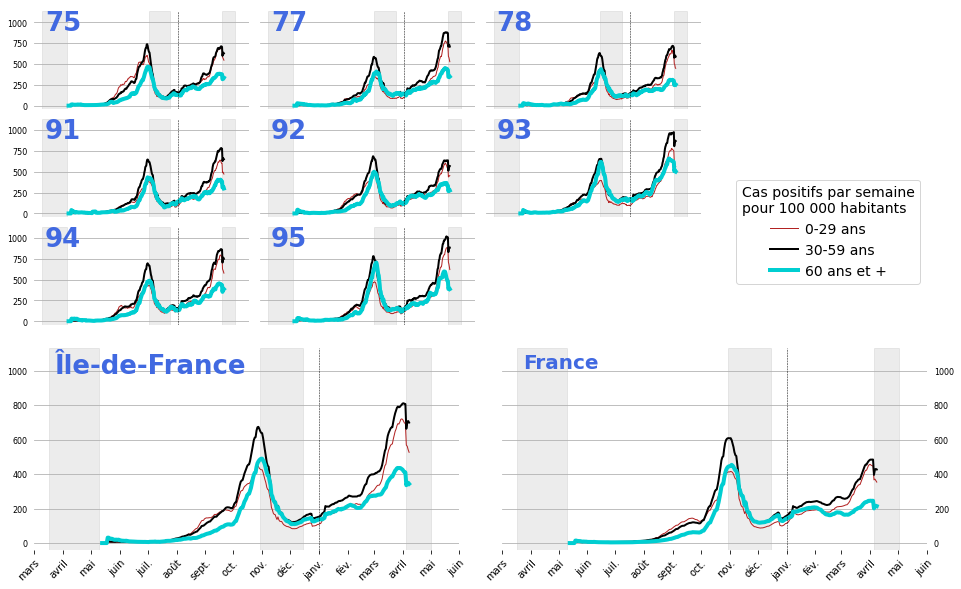

In [29]:
region = 'Île-de-France'
column_to_plot = "incidence hebdo"
synthese_par_region(d, region, column_to_plot)

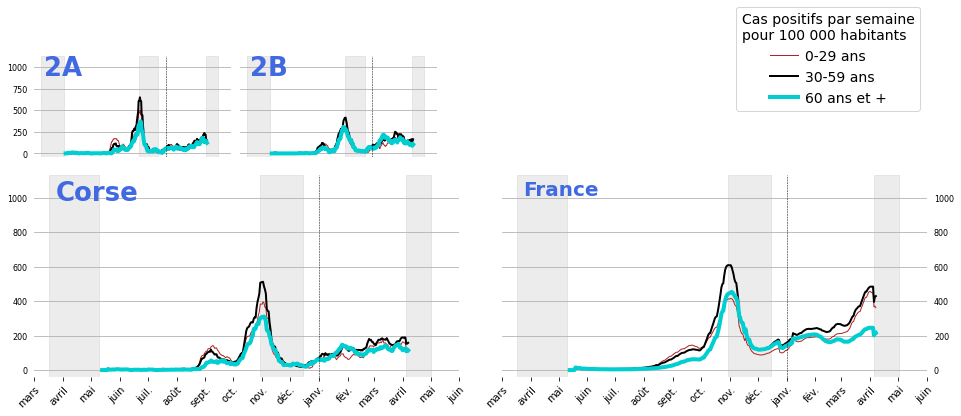

In [6]:
region = 'Corse'
column_to_plot = "incidence hebdo"
synthese_par_region(d, region, column_to_plot)

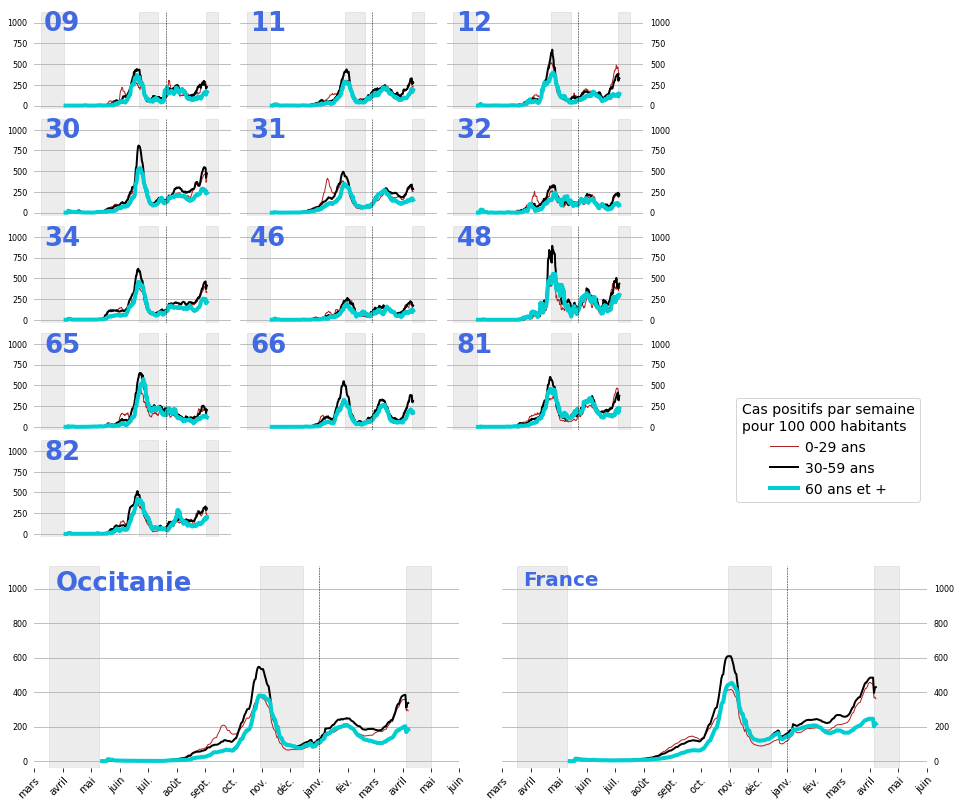

In [7]:
region = 'Occitanie'
column_to_plot = "incidence hebdo"
synthese_par_region(d, region, column_to_plot)